In [18]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import webbrowser
import os
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

  
df = pd.read_csv("Tema_4.csv")


# Paleta de colores personalizada
colores = {
    'principal': '#0047AB',   
    'oscuro': '#00264D',      
    'cian': '#00A6ED',        
    'dorado': '#C5A100',      
    'gris': '#E5E5E5'         
}

# Aplicar estilo general
plt.style.use('default')
sns.set_palette([colores['principal']])
sns.set_context("notebook", font_scale=1.0)
plt.rcParams.update({
    'axes.facecolor': 'white',
    'axes.edgecolor': colores['oscuro'],
    'grid.color': '#cccccc',
    'grid.linestyle': '--',
    'grid.alpha': 0.6
})

color_base = colores['principal']


# Análisis Exploratorio

El dataset contiene 4531 filas (registros) y 17 columnas


,Columnas,Tipo de dato,Valores no nulos,Valores nulos,Porcentaje nulos (%)
age,age,object,4305,226,4.99
job,job,object,4305,226,4.99
marital,marital,object,4305,226,4.99
education,education,object,4305,226,4.99
default,default,object,4305,226,4.99
balance,balance,float64,4306,225,4.97
housing,housing,object,4305,226,4.99
loan,loan,object,4304,227,5.01
contact,contact,object,4304,227,5.01
day,day,float64,4304,227,5.01


------------------------- VALORES NULOS DEL DATASET ------------------------


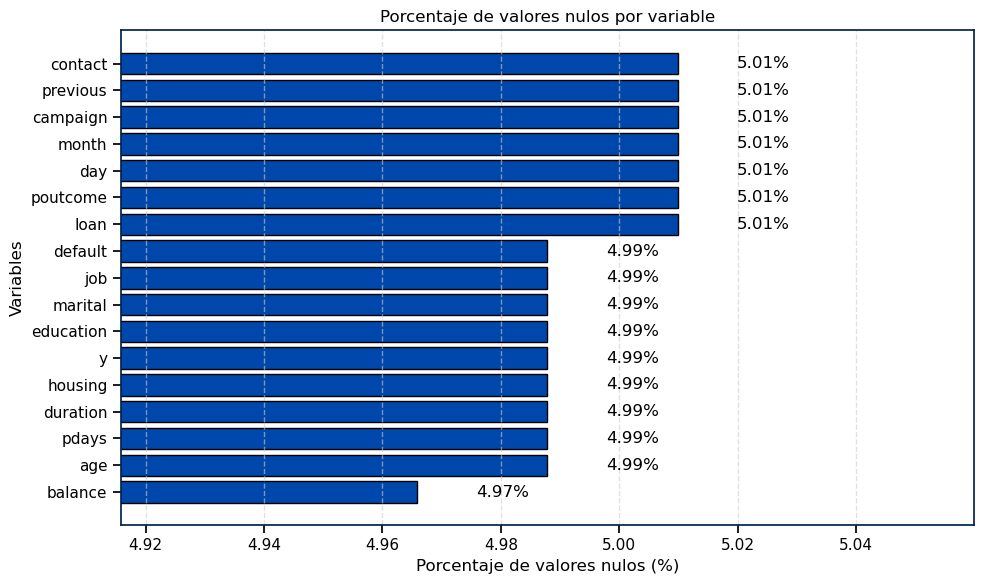

Cantidad de registros duplicados: 10


,count,mean,std,min,25%,50%,75%,max,rango
balance,4306.0,8829.596609,72317.091425,-3313.0,70.0,453.5,1538.25,711880.0,715193.0
day,4304.0,15.922630,8.240703,1.0,9.0,16.0,21.00,31.0,30.0
duration,4305.0,264.458304,261.527707,4.0,104.0,185.0,330.00,3025.0,3021.0
campaign,4304.0,2.780901,3.072688,1.0,1.0,2.0,3.00,50.0,49.0
pdays,4305.0,39.794657,100.257056,-1.0,-1.0,-1.0,-1.00,871.0,872.0
previous,4304.0,0.533457,1.673374,0.0,0.0,0.0,0.00,25.0,25.0


Sesgo (skewness) de las variables numéricas:


balance     9.607852
previous    5.939112
campaign    4.829506
duration    2.796322
pdays       2.727618
day         0.093361
dtype: float64

Cantidad de outliers por variable:


balance     486
day           0
duration    310
campaign    299
pdays       777
previous    773
dtype: int64

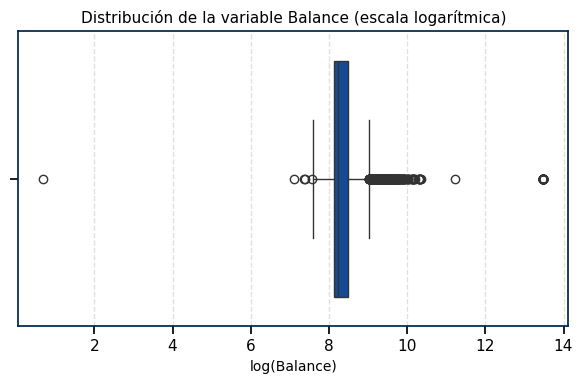

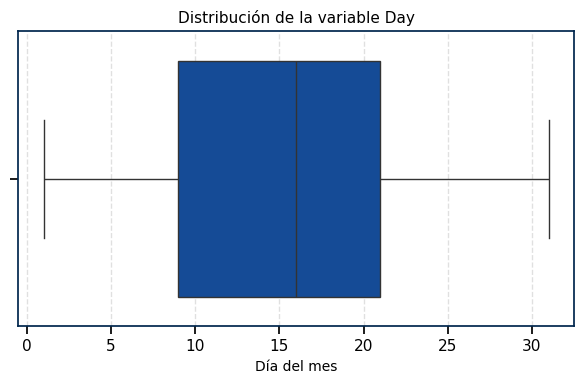

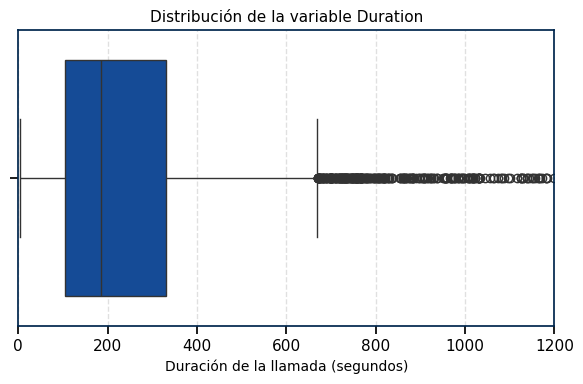

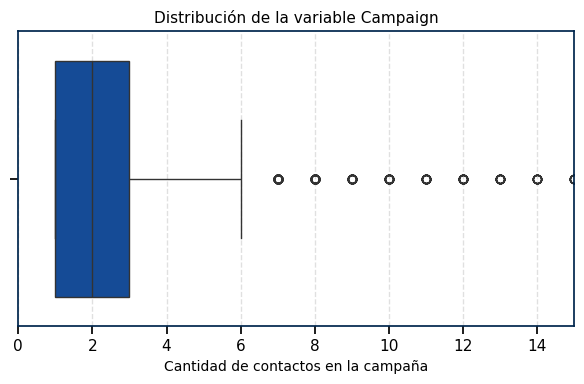

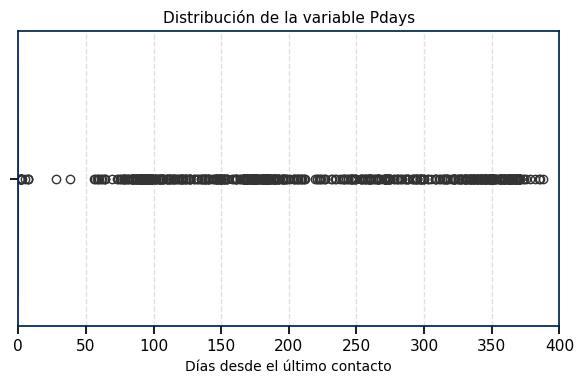

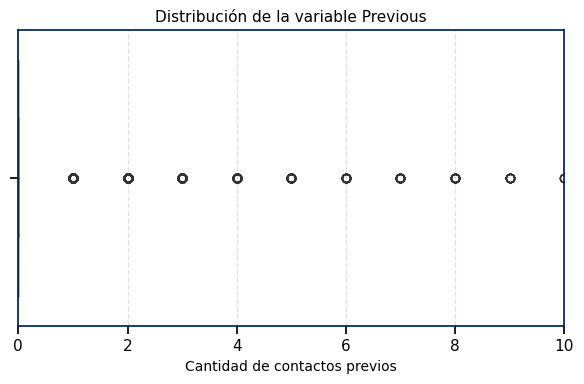

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 25.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

-------------------- DISTRIBUCIÓN DE VARIABLES NUMÉRICAS CONTÍNUAS --------------------


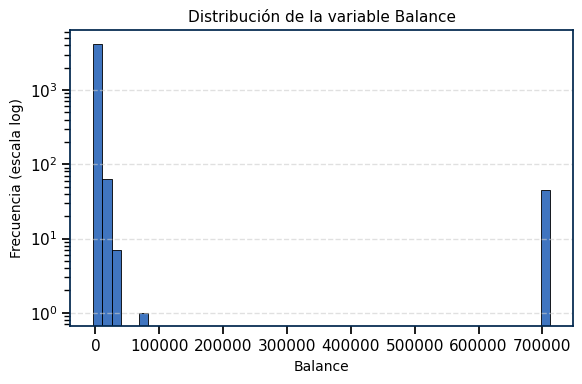

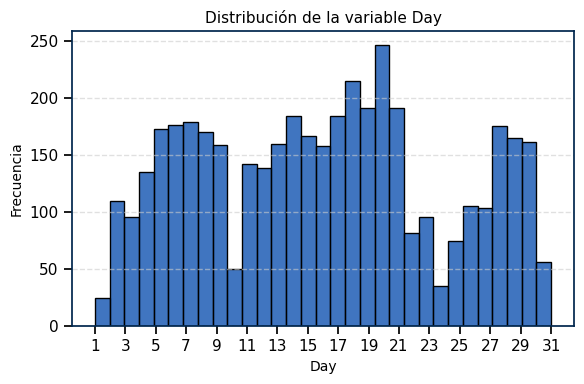

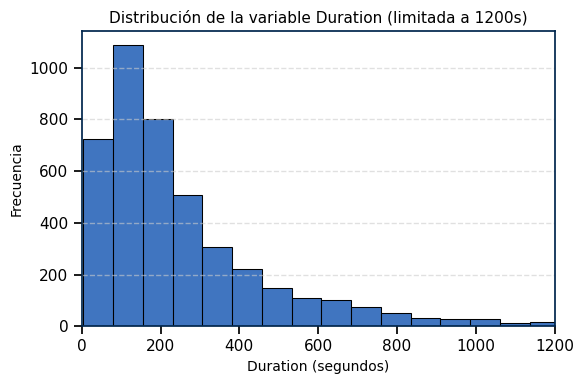

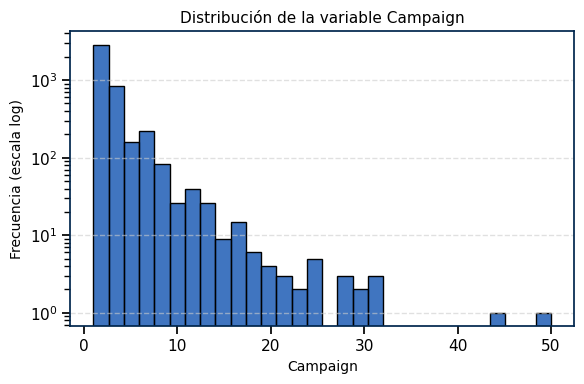

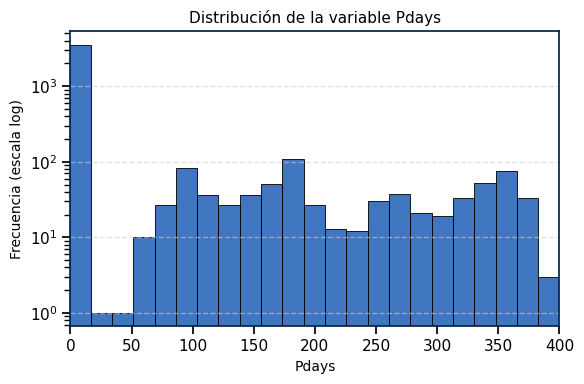

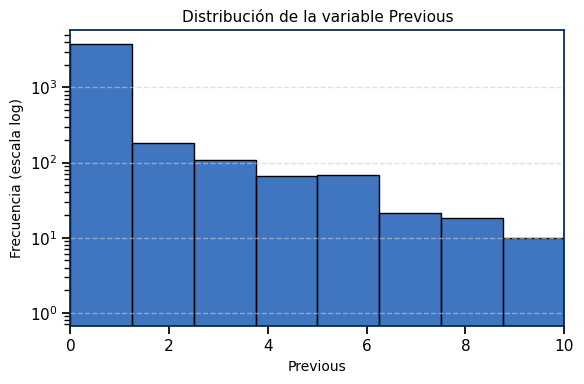

-------------------- DISTRIBUCIÓN DE VARIABLES BINARIAS --------------------


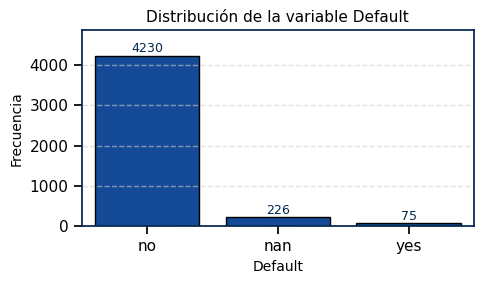

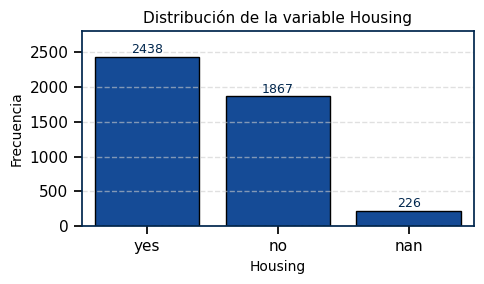

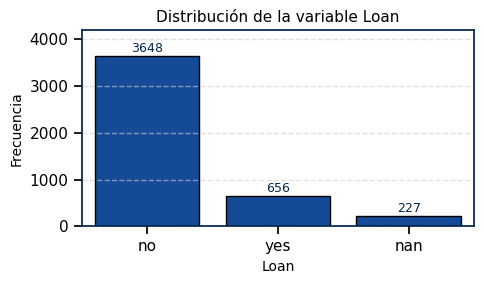

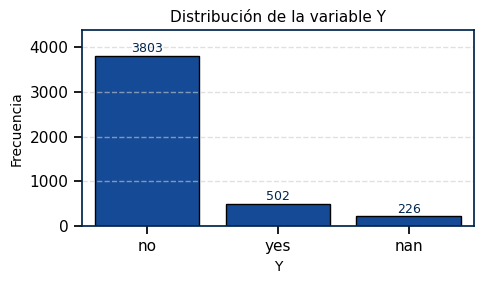

-------------------- DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS --------------------


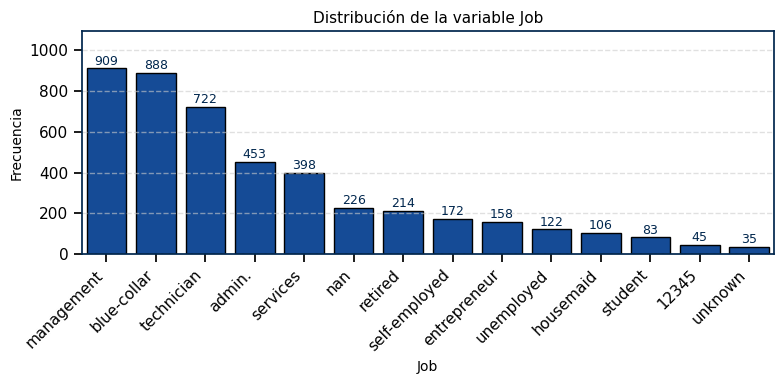

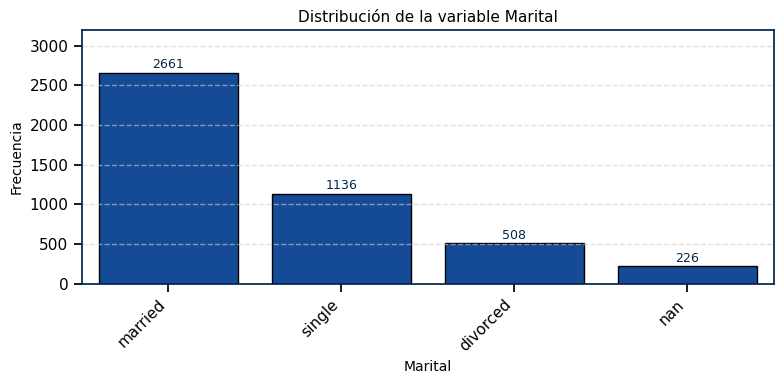

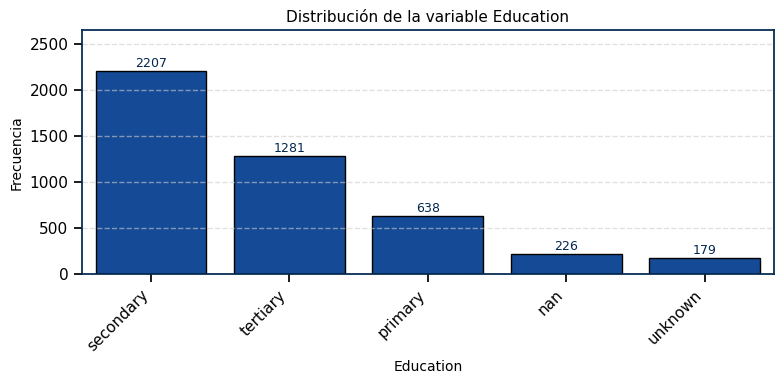

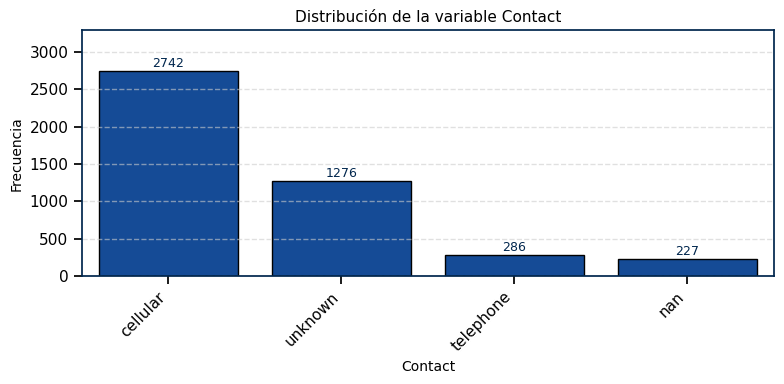

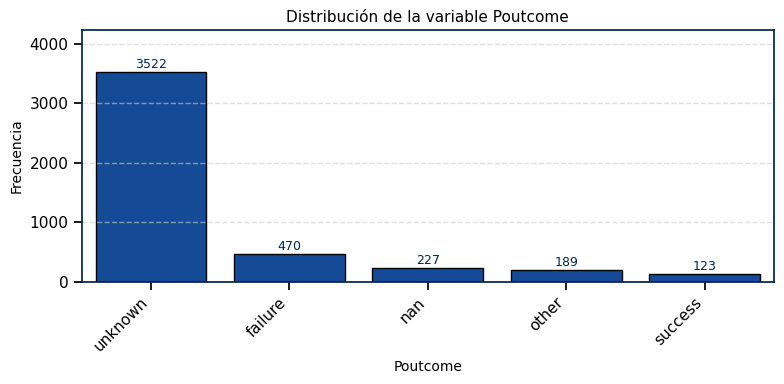

In [2]:
%matplotlib inline

print(f"El dataset contiene {df.shape[0]} filas (registros) y {df.shape[1]} columnas")

filas = df.shape[0]
columnas = df.shape[1]
total_celdas = df.size

info_df = pd.DataFrame({
    'Columnas': df.columns,
    'Tipo de dato': df.dtypes,
    'Valores no nulos': df.notnull().sum(),
    'Valores nulos': df.isnull().sum(),
    'Porcentaje nulos (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

display(info_df)

print("------------------------- VALORES NULOS DEL DATASET ------------------------")
porcentaje_nulos = (df.isna().mean() * 100).sort_values()

plt.figure(figsize=(10,6))
plt.barh(porcentaje_nulos.index, porcentaje_nulos.values, color=color_base, edgecolor='black')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Variables')
plt.title('Porcentaje de valores nulos por variable')

for i, v in enumerate(porcentaje_nulos.values):
    plt.text(v + 0.01, i, f"{v:.2f}%", va='center')

minv, maxv = porcentaje_nulos.min(), porcentaje_nulos.max()
plt.xlim(minv - 0.05, maxv + 0.05)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Chequeo de duplicados
duplicados = df.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicados}")

# Estadísticos descriptivos y rango
variables_numericas = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
stats = df[variables_numericas].describe().T
stats["rango"] = stats["max"] - stats["min"]
display(stats)

# Sesgo (skewness)
sesgo = df[variables_numericas].skew().sort_values(ascending=False)
print("Sesgo (skewness) de las variables numéricas:")
display(sesgo)

# Outliers Qi
Q1 = df[variables_numericas].quantile(0.25)
Q3 = df[variables_numericas].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[variables_numericas] < (Q1 - 1.5 * IQR)) | (df[variables_numericas] > (Q3 + 1.5 * IQR))).sum()
print("Cantidad de outliers por variable:")
display(outliers)

# Boxplots para variables numéricas

# --- Balance ---
plt.figure(figsize=(6,4))

sns.boxplot(x=np.log1p(df['balance'] - df['balance'].min() + 1), color=color_base)

plt.title('Distribución de la variable Balance (escala logarítmica)', fontsize=11)
plt.xlabel('log(Balance)', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- Day ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['day'], color=color_base)
plt.title('Distribución de la variable Day', fontsize=11)
plt.xlabel('Día del mes', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Duration ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['duration'], color=color_base)
plt.title('Distribución de la variable Duration', fontsize=11)
plt.xlabel('Duración de la llamada (segundos)', fontsize=10)
plt.xlim(0, 1200)  # te muestra la mayoría de llamadas
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Campaign ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['campaign'], color=color_base)
plt.title('Distribución de la variable Campaign', fontsize=11)
plt.xlabel('Cantidad de contactos en la campaña', fontsize=10)
plt.xlim(0, 15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Pdays ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['pdays'], color=color_base)
plt.title('Distribución de la variable Pdays', fontsize=11)
plt.xlabel('Días desde el último contacto', fontsize=10)
plt.xlim(0, 400)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Previous ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['previous'], color=color_base)
plt.title('Distribución de la variable Previous', fontsize=11)
plt.xlabel('Cantidad de contactos previos', fontsize=10)
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


profile = ProfileReport(df, title="Tema_4", explorative=True)
profile.to_file("Tema_4.html")

archivo_html = os.path.abspath("Tema_4.html")
webbrowser.open(f"file://{archivo_html}")

variables_binarias = ['default', 'housing', 'loan', 'y']
variables_categoricas = ['job', 'marital', 'education', 'contact', 'poutcome']

print("-------------------- DISTRIBUCIÓN DE VARIABLES NUMÉRICAS CONTÍNUAS --------------------")

# --- BALANCE ---
plt.figure(figsize=(6,4))
sns.histplot(df['balance'], bins=50, color=color_base, edgecolor='black', kde=False)
plt.yscale('log')
plt.title('Distribución de la variable Balance', fontsize=11)
plt.xlabel('Balance', fontsize=10)
plt.ylabel('Frecuencia (escala log)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- DAY ---
plt.figure(figsize=(6,4))
sns.histplot(df['day'], bins=31, color=color_base, edgecolor='black', kde=False)
plt.xticks(range(1,32,2))
plt.title('Distribución de la variable Day', fontsize=11)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- DURATION ---
plt.figure(figsize=(6,4))
sns.histplot(df['duration'], bins=40, color=color_base, edgecolor='black', kde=False)
plt.xlim(0, 1200)
plt.title('Distribución de la variable Duration (limitada a 1200s)', fontsize=11)
plt.xlabel('Duration (segundos)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- CAMPAIGN ---
plt.figure(figsize=(6,4))
sns.histplot(df['campaign'], bins=30, color=color_base, edgecolor='black', kde=False)
plt.yscale('log')
plt.title('Distribución de la variable Campaign', fontsize=11)
plt.xlabel('Campaign', fontsize=10)
plt.ylabel('Frecuencia (escala log)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- PDAYS ---
plt.figure(figsize=(6,4))
sns.histplot(df['pdays'], bins=50, color=color_base, edgecolor='black', kde=False)
plt.xlim(0, 400)
plt.yscale('log')
plt.title('Distribución de la variable Pdays', fontsize=11)
plt.xlabel('Pdays', fontsize=10)
plt.ylabel('Frecuencia (escala log)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- PREVIOUS ---
plt.figure(figsize=(6,4))
sns.histplot(df['previous'], bins=20, color=color_base, edgecolor='black', kde=False)
plt.xlim(0, 10)
plt.yscale('log')
plt.title('Distribución de la variable Previous', fontsize=11)
plt.xlabel('Previous', fontsize=10)
plt.ylabel('Frecuencia (escala log)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("-------------------- DISTRIBUCIÓN DE VARIABLES BINARIAS --------------------")
for col in variables_binarias:
    plt.figure(figsize=(5,3))
    valores = df[col].value_counts(dropna=False)

    sns.barplot(
        x=valores.index.astype(str),
        y=valores.values,
        color=color_base,
        edgecolor='black'
    )
    
    plt.ylim(0, valores.max() * 1.15)
    plt.title(f'Distribución de la variable {col.capitalize()}', fontsize=11)
    plt.xlabel(col.capitalize(), fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for i, v in enumerate(valores.values):
        plt.text(i, v + (valores.max() * 0.02), str(v), ha='center', fontsize=9, color=colores['oscuro'])
    
    plt.tight_layout()
    plt.show()

print("-------------------- DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS --------------------")
for col in variables_categoricas:
    plt.figure(figsize=(8,4))
    valores = df[col].value_counts(dropna=False).sort_values(ascending=False)
    
    sns.barplot(
        x=valores.index.astype(str),
        y=valores.values,
        color=color_base,
        edgecolor='black'
    )

    plt.ylim(0, valores.max() * 1.20)
    plt.title(f'Distribución de la variable {col.capitalize()}', fontsize=11)
    plt.xlabel(col.capitalize(), fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for i, v in enumerate(valores.values):
        plt.text(i, v + (valores.max() * 0.02), str(v), ha='center', fontsize=9, color=colores['oscuro'])
    
    plt.tight_layout()
    plt.show()

# Limpieza de datos e imputaciones

### Duplicados

In [4]:
df_cleaned = df.copy()

dup = df_cleaned.duplicated().sum()
print(f"Duplicados encontrados: {dup}")

if dup > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Duplicados eliminados. Nuevo total: {df_cleaned.shape[0]} filas.")
else:
    print("No se encontraron duplicados.")
    


Duplicados encontrados: 10
Duplicados eliminados. Nuevo total: 4521 filas.


### Corrección tipo de datos

In [5]:
df_cleaned.replace(
    ['unknown', 'unknown_age', 'nonexistent', 'NA', 'na', 'None'],
    np.nan,
    inplace=True
)

# Asegurar tipos numéricos
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in num_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

print("Tipos de datos corregidos y valores especiales convertidos a NaN.")

Tipos de datos corregidos y valores especiales convertidos a NaN.


### Inconsistencias y relaciones lógicas

In [6]:
# Valores especiales en pdays
df_cleaned['pdays'] = df_cleaned['pdays'].replace(-1, np.nan)

# Relación previous - pdays - poutcome
df_cleaned.loc[df_cleaned['previous'] == 0, 'pdays'] = np.nan
df_cleaned.loc[df_cleaned['previous'] == 0, 'poutcome'] = 'nonexistent'

# duration = 0 entonces y = 'no'
df_cleaned.loc[df_cleaned['duration'] == 0, 'y'] = 'no'

# Rangos válidos
df_cleaned.loc[(df_cleaned['age'] < 18) | (df_cleaned['age'] > 100), 'age'] = np.nan
df_cleaned.loc[(df_cleaned['day'] < 1) | (df_cleaned['day'] > 31), 'day'] = np.nan

# Campañas y contactos negativos - NaN
for col in ['campaign', 'previous']:
    df_cleaned.loc[df_cleaned[col] < 0, col] = np.nan

print("Inconsistencias y relaciones lógicas corregidas.")

Inconsistencias y relaciones lógicas corregidas.


### Limpieza por variable 

In [7]:
# --- AGE ---
df_cleaned = df_cleaned[(df_cleaned['age'].between(18, 100)) | (df_cleaned['age'].isna())]
mediana_edad = df_cleaned['age'].median()
df_cleaned['age'] = df_cleaned['age'].fillna(mediana_edad)

# --- JOB ---
df_cleaned['job'] = (
    df_cleaned['job'].astype(str).str.strip().str.lower()
    .replace({'admin.': 'admin', '12345': 'unknown', 'nan': 'unknown', 'none': 'unknown'})
    .fillna('unknown')
)

# --- MARITAL ---
df_cleaned['marital'] = (
    df_cleaned['marital'].astype(str).str.strip().str.lower()
    .replace({'nan': 'unknown', 'none': 'unknown'})
    .fillna('unknown')
)

# --- EDUCATION ---
df_cleaned['education'] = (
    df_cleaned['education'].astype(str).str.strip().str.lower()
    .replace({
        'basic.4y': 'primary', 'basic.6y': 'primary',
        'basic.9y': 'secondary', 'university.degree': 'tertiary',
        'high.school': 'secondary', 'illiterate': 'primary',
        'nan': 'unknown', 'none': 'unknown'
    })
    .fillna('unknown')
)

# Imputación contextual según job
imputacion_por_job = {
    'management': 'tertiary', 'technician': 'tertiary',
    'entrepreneur': 'tertiary', 'self-employed': 'tertiary',
    'admin': 'secondary', 'services': 'secondary',
    'blue-collar': 'primary', 'housemaid': 'primary',
    'unemployed': 'primary', 'student': 'tertiary',
    'retired': 'unknown', 'unknown': 'unknown'
}
mask = (df_cleaned['education'] == 'unknown') & (df_cleaned['job'].notna())
df_cleaned.loc[mask, 'education'] = df_cleaned.loc[mask, 'job'].map(imputacion_por_job)

# --- DEFAULT / HOUSING / LOAN ---
for col in ['default', 'housing', 'loan']:
    df_cleaned[col] = (
        df_cleaned[col].astype(str).str.strip().str.lower()
        .replace({'yes': True, 'no': False, 'nan': np.nan, 'none': np.nan})
        .astype('boolean')
    )

# --- DAY ---
df_cleaned = df_cleaned[(df_cleaned['day'] >= 1) & (df_cleaned['day'] <= 31)]
df_cleaned['day'] = df_cleaned['day'].astype('Int64')

# --- CAMPAIGN ---
q99 = df_cleaned['campaign'].quantile(0.99)
df_cleaned.loc[df_cleaned['campaign'] > q99, 'campaign'] = np.nan
df_cleaned['campaign'] = df_cleaned['campaign'].fillna(df_cleaned['campaign'].median()).astype('Int64')

# --- PREVIOUS ---
q99 = df_cleaned['previous'].quantile(0.99)
df_cleaned.loc[df_cleaned['previous'] > q99, 'previous'] = np.nan
df_cleaned['previous'] = df_cleaned['previous'].astype('Int64')

# --- PDAYS ---
df_cleaned.loc[df_cleaned['pdays'] == -1, 'pdays'] = np.nan
df_cleaned['pdays'] = df_cleaned['pdays'].astype('Int64')

# --- POUTCOME ---
df_cleaned['poutcome'] = (
    df_cleaned['poutcome'].astype(str).str.strip().str.lower()
    .replace({
        'nonexistant': 'nonexistent', 'unknown': 'nonexistent',
        'none': 'nonexistent', 'nan': np.nan
    })
)
df_cleaned['poutcome'] = pd.Categorical(
    df_cleaned['poutcome'], categories=['failure', 'nonexistent', 'success'], ordered=False
)

# --- Y (variable objetivo) ---
df_cleaned['y'] = (
    df_cleaned['y'].astype(str).str.strip().str.lower()
    .replace({'yes': True, 'no': False, 'nan': np.nan, 'none': np.nan})
    .astype('boolean')
)
df_cleaned.loc[df_cleaned['duration'] == 0, 'y'] = False

### Columnas constantes / redundantes

In [8]:
# Eliminar columnas con un solo valor
constantes = [col for col in df_cleaned.columns if df_cleaned[col].nunique(dropna=False) <= 1]
if constantes:
    df_cleaned.drop(columns=constantes, inplace=True)
    print(f"Columnas constantes eliminadas: {constantes}")

# Eliminar redundantes
if 'duration' in df_cleaned.columns:
    df_cleaned.drop(columns=['duration'], inplace=True)
    print("duration eliminada (solo conocida post-contacto).")

if 'pdays' in df_cleaned.columns:
    df_cleaned.drop(columns=['pdays'], inplace=True)
    print("pdays eliminada (alta correlación con previous).")

print(f"Columnas restantes: {df_cleaned.shape[1]}")

duration eliminada (solo conocida post-contacto).
pdays eliminada (alta correlación con previous).
Columnas restantes: 15


### Imputación de nulos

In [9]:
# Numéricas con sesgos - mediana
cols_mediana = ['balance', 'campaign', 'previous']
imputer_med = SimpleImputer(strategy='median')
df_cleaned[cols_mediana] = imputer_med.fit_transform(df_cleaned[cols_mediana])

# Numéricas simétricas - media
cols_media = ['age', 'day']
imputer_mean = SimpleImputer(strategy='mean')
df_cleaned[cols_media] = imputer_mean.fit_transform(df_cleaned[cols_media])

# Categóricas - moda
cols_moda = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
imputer_mode = SimpleImputer(strategy='most_frequent')
df_cleaned[cols_moda] = imputer_mode.fit_transform(df_cleaned[cols_moda])

# Binarias - completar con valor más frecuente
cols_bin = ['default', 'housing', 'loan']
for col in cols_bin:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("\nImputación final completada. Resumen de nulos:")
print(df_cleaned.isna().sum())


Imputación final completada. Resumen de nulos:
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
campaign       0
previous       0
poutcome       0
y            218
dtype: int64


### Verificación

In [11]:
print(f"Dataset final: {df_cleaned.shape[0]} filas y {df_cleaned.shape[1]} columnas")
print("Columnas finales:")
print(df_cleaned.columns.tolist())

print("\nCantidad total de valores nulos:", df_cleaned.isna().sum().sum())

df_cleaned.info()
df_cleaned.to_csv("df_cleaned.csv", index=False, encoding="utf-8")



Dataset final: 4295 filas y 15 columnas
Columnas finales:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'previous', 'poutcome', 'y']

Cantidad total de valores nulos: 218
<class 'pandas.core.frame.DataFrame'>
Index: 4295 entries, 0 to 4519
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4295 non-null   float64
 1   job        4295 non-null   object 
 2   marital    4295 non-null   object 
 3   education  4295 non-null   object 
 4   default    4295 non-null   boolean
 5   balance    4295 non-null   float64
 6   housing    4295 non-null   boolean
 7   loan       4295 non-null   boolean
 8   contact    4295 non-null   object 
 9   day        4295 non-null   float64
 10  month      4295 non-null   object 
 11  campaign   4295 non-null   float64
 12  previous   4295 non-null   float64
 13  poutcome   4295 non-null   object 
 14  y        

## Normalización y PCA

Filas antes: 4295, después de eliminar nulos en y: 4077
Train shape: (3261, 14), Test shape: (816, 14)
Variables numéricas:  ['age', 'balance', 'day', 'campaign', 'previous']
Variables categóricas:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Preprocesamiento completado.
Forma despues de escalado/codificación: (3261, 48)

PCA completado.
Componentes seleccionados: 24
Varianza total explicada: 95.56%


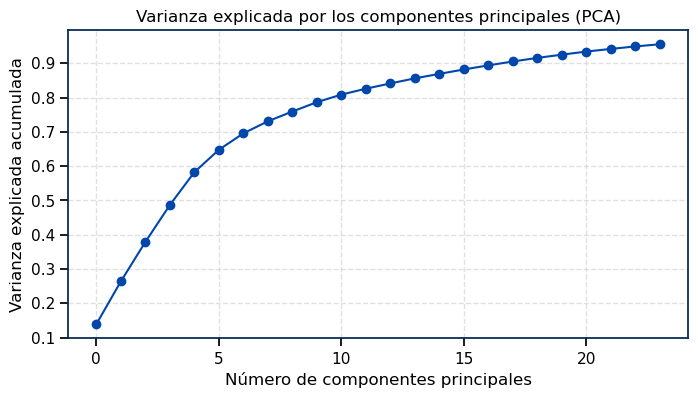

,num__age,num__balance,num__day,num__campaign,num__previous,cat__job_admin,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,...,cat__month_jul,cat__month_jun,cat__month_mar,cat__month_may,cat__month_nov,cat__month_oct,cat__month_sep,cat__poutcome_failure,cat__poutcome_nonexistent,cat__poutcome_success
0,0.089975,-0.150226,0.540178,0.568897,-0.549523,-0.010258,0.002834,0.001299,0.000227,0.003249,...,0.069279,-0.011240,-0.001115,-0.043359,-0.009193,-0.003290,-0.008391,-0.106980,0.137170,-0.030190
1,0.914641,-0.078121,-0.105538,-0.050893,0.063010,-0.017973,-0.018297,0.004581,0.012921,-0.009046,...,-0.001988,0.022302,0.006530,-0.080496,0.016707,0.012528,-0.000137,0.016091,-0.026144,0.010053
2,0.059938,0.623949,0.397145,0.341216,0.548283,0.006252,-0.024015,-0.002699,-0.001796,0.028300,...,0.002815,-0.036104,0.000859,-0.039626,0.021733,0.003868,0.000836,0.086524,-0.111723,0.025198
3,0.055201,0.758448,-0.291062,-0.107718,-0.542857,-0.013331,0.023247,-0.001355,0.000907,-0.006266,...,0.006883,0.051899,-0.000808,-0.009488,-0.016681,-0.005369,-0.004234,-0.095607,0.118508,-0.022900
4,-0.051653,-0.069813,-0.659454,0.728466,0.110813,-0.013189,-0.002563,-0.000698,-0.000473,0.019247,...,-0.009098,0.059241,0.003777,-0.022694,-0.036577,-0.011741,0.000970,0.012510,-0.012493,-0.000017
5,0.127393,0.023606,0.051138,0.067245,0.018563,0.049702,0.181175,-0.006638,-0.009993,-0.213069,...,-0.021681,-0.041051,-0.006244,0.296612,-0.023491,-0.012307,-0.012438,0.035082,-0.021670,-0.013412
6,-0.062541,0.010757,-0.036409,0.000848,0.042968,0.091784,0.035945,-0.018324,0.004209,-0.338265,...,0.068729,0.021023,0.001482,-0.168389,-0.015707,0.010610,0.002009,-0.010276,-0.004451,0.014727
7,-0.280837,0.005474,0.005530,-0.046992,0.035607,-0.042653,0.167210,0.013731,0.009746,0.017319,...,0.071277,0.035633,-0.003342,-0.168249,0.010519,-0.000046,0.005110,-0.015934,0.011831,0.004104
8,-0.056192,-0.014958,0.013421,0.025207,0.006267,-0.088209,0.389473,-0.022807,0.018263,-0.156426,...,-0.149384,0.028303,0.003064,0.211402,-0.064759,0.002526,0.004769,-0.003577,-0.008875,0.012451
9,-0.014122,-0.001034,-0.002618,0.008989,0.046867,-0.057275,0.325445,0.016655,0.021006,-0.127055,...,0.144925,0.001416,-0.004524,0.028678,-0.024175,-0.008570,-0.002190,-0.021456,0.033777,-0.012321


In [26]:
df_aux = df_cleaned.copy()

# Separación de variable objetivo (target) y features

target_col = "y" #variable objetivo (ésta indica si se abre o no un depósito a largo plazo)
df_train = df_aux.dropna(subset=[target_col]) #para el entrenamiento considero solo las filas útiles
print(f"Filas antes: {df_cleaned.shape[0]}, después de eliminar nulos en y: {df_train.shape[0]}")

X = df_train.drop(columns=[target_col]) #variables predictoras (todas menos "y")
y = df_train[target_col]

# Se separa el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Se identifican variables numéricas y categóricas, permitiendo aplicar diferentes transformaciones a cada tipo

numeric_cols = X_train.select_dtypes(include="float64").columns
categorical_cols = X_train.select_dtypes(include=["object", "boolean"]).columns

print("Variables numéricas: ", list(numeric_cols))
print("Variables categóricas: ", list(categorical_cols))

# Se define el preprocesador
# Se usa StandardScaler para normalizar variables numéricas
# Se usa OneHotEncoder para transformar las categóricas.

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols) 
    ]
)

# Se ajusta el preprocesador solo con los datos de entrenamiento
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("\nPreprocesamiento completado.")
print(f"Forma despues de escalado/codificación: {X_train_scaled.shape}")

# PCA con datos ya normalizados (solo train)
pca = PCA(n_components=0.95) #conserva los componentes que explican el 95% de la varianza total

X_train_pca = pca.fit_transform(X_train_scaled.toarray())
X_test_pca = pca.transform(X_test_scaled.toarray())

# Visualización de resultados del PCA

print("\nPCA completado.")
print(f"Componentes seleccionados: {pca.n_components_}")
print(f"Varianza total explicada: {pca.explained_variance_ratio_.sum():.2%}")

# Se grafica la varianza explicada por cada componente
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada por los componentes principales (PCA)")
plt.grid(True)
plt.show()

# Análisis sobre cuáles variables influyen más en los primeros componentes
componentes = pd.DataFrame(pca.components_, columns=preprocessor.get_feature_names_out())
componentes.head(10)





